In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline

## Importing the CSV file

In [2]:
df = pd.read_csv("G:/Internship - value momentum/insuras.csv")

In [3]:
df.shape

(204, 26)

In [4]:
df.head(5)

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Correlation Matrix

In [5]:

def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(corr.shape[1]), corr.columns)
    plt.yticks(range(corr.shape[1]), corr.columns)

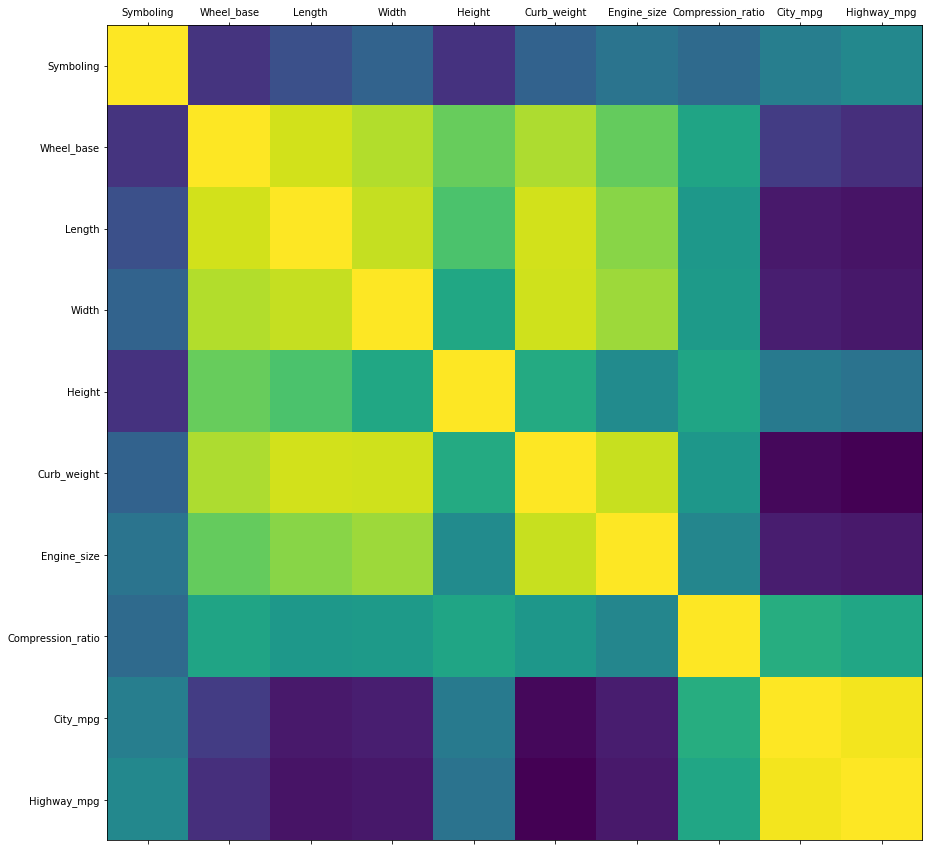

In [6]:
plot_corr(df)

In [7]:
del df['Highway_mpg']

In [8]:
df.dtypes

Symboling              int64
Normalized_losses     object
Make                  object
Fuel_type             object
Aspiration            object
Num_of_doors          object
Body_style            object
Drive_wheels          object
Engine_location       object
Wheel_base           float64
Length               float64
Width                float64
Height               float64
Curb_weight            int64
Engine_type           object
Num_of_cylinders      object
Engine_size            int64
Fuel_system           object
Bore                  object
Stroke                object
Compression_ratio    float64
Horse_power           object
Peak_RPM              object
City_mpg               int64
Price                 object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 25 columns):
Symboling            204 non-null int64
Normalized_losses    204 non-null object
Make                 204 non-null object
Fuel_type            204 non-null object
Aspiration           204 non-null object
Num_of_doors         204 non-null object
Body_style           204 non-null object
Drive_wheels         204 non-null object
Engine_location      204 non-null object
Wheel_base           204 non-null float64
Length               204 non-null float64
Width                204 non-null float64
Height               204 non-null float64
Curb_weight          204 non-null int64
Engine_type          204 non-null object
Num_of_cylinders     204 non-null object
Engine_size          204 non-null int64
Fuel_system          204 non-null object
Bore                 204 non-null object
Stroke               204 non-null object
Compression_ratio    204 non-null float64
Horse_power          204 non-nul

In [10]:
df.isnull().values.any()

False

## Replacing NULL values

In [11]:
df['Normalized_losses'].replace('?','NaN',inplace=True)

In [12]:
df.head(5)

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Num_of_cylinders,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,15250


In [13]:
df.isnull().values.any()

False

## Binary Encoding

In [14]:
df['Isstd'] = np.where(df.Aspiration == 'std',1,0)

In [15]:
df['Istwo'] = np.where(df.Num_of_doors == 'two',1,0)

## One-Hot Encoding

In [16]:
df=pd.get_dummies(df,columns=['Make','Fuel_type','Body_style','Drive_wheels','Engine_location','Engine_type','Num_of_cylinders'])

In [17]:
df.shape

(204, 68)

In [18]:
df.head()

,Symboling,Normalized_losses,Aspiration,Num_of_doors,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,...,Engine_type_ohcf,Engine_type_ohcv,Engine_type_rotor,Num_of_cylinders_eight,Num_of_cylinders_five,Num_of_cylinders_four,Num_of_cylinders_six,Num_of_cylinders_three,Num_of_cylinders_twelve,Num_of_cylinders_two
0,3,NaN,std,two,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
1,1,NaN,std,two,94.5,171.2,65.5,52.4,2823,152,...,0,1,0,0,0,0,1,0,0,0
2,2,164,std,four,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,0
3,2,164,std,four,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,1,0,0,0,0,0
4,2,NaN,std,two,99.8,177.3,66.3,53.1,2507,136,...,0,0,0,0,1,0,0,0,0,0


In [19]:
df.replace('?','NaN',inplace=True)

In [20]:
df.Horse_power.astype(float).mean()

104.22277227722772

In [22]:
df.Stroke=df.Stroke.astype(float)
df.Price=df.Price.astype(float)

In [22]:
df.dtypes

Symboling                    int64
Normalized_losses           object
Aspiration                  object
Num_of_doors                object
Wheel_base                 float64
Length                     float64
Width                      float64
Height                     float64
Curb_weight                  int64
Engine_size                  int64
Fuel_system                 object
Bore                        object
Stroke                     float64
Compression_ratio          float64
Horse_power                 object
Peak_RPM                    object
City_mpg                     int64
Price                       object
Isstd                        int64
Istwo                        int64
Make_alfa-romero             int64
Make_audi                    int64
Make_bmw                     int64
Make_chevrolet               int64
Make_dodge                   int64
Make_honda                   int64
Make_isuzu                   int64
Make_jaguar                  int64
Make_mazda          

## Converting Object to Float

In [23]:
df.Horse_power=df.Horse_power.astype(float)

In [24]:
df.Bore=df.Bore.astype(float)

In [25]:
df.Peak_RPM=df.Peak_RPM.astype(float)

In [26]:
df.dtypes

Symboling                    int64
Normalized_losses           object
Aspiration                  object
Num_of_doors                object
Wheel_base                 float64
Length                     float64
Width                      float64
Height                     float64
Curb_weight                  int64
Engine_size                  int64
Fuel_system                 object
Bore                       float64
Stroke                     float64
Compression_ratio          float64
Horse_power                float64
Peak_RPM                   float64
City_mpg                     int64
Price                      float64
Isstd                        int64
Istwo                        int64
Make_alfa-romero             int64
Make_audi                    int64
Make_bmw                     int64
Make_chevrolet               int64
Make_dodge                   int64
Make_honda                   int64
Make_isuzu                   int64
Make_jaguar                  int64
Make_mazda          

In [27]:
df.Normalized_losses=df.Normalized_losses.astype(float)


In [28]:
df.Normalized_losses.mean()

122.0

## Drop duplicate columns

In [29]:
df.drop(['Aspiration','Num_of_doors'], axis=1, inplace=True)

In [30]:
df.shape

(204, 66)

In [31]:
df.head()

,Symboling,Normalized_losses,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Fuel_system,Bore,...,Engine_type_ohcf,Engine_type_ohcv,Engine_type_rotor,Num_of_cylinders_eight,Num_of_cylinders_five,Num_of_cylinders_four,Num_of_cylinders_six,Num_of_cylinders_three,Num_of_cylinders_twelve,Num_of_cylinders_two
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
1,1,NaN,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,...,0,1,0,0,0,0,1,0,0,0
2,2,164.0,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,...,0,0,0,0,0,1,0,0,0,0
3,2,164.0,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,...,0,0,0,0,1,0,0,0,0,0
4,2,NaN,99.8,177.3,66.3,53.1,2507,136,mpfi,3.19,...,0,0,0,0,1,0,0,0,0,0


In [32]:
df=pd.get_dummies(df,columns=['Fuel_system'])

In [33]:
df.shape

(204, 73)

## Mean Imputation

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
df=df.astype(float)

In [36]:
df.mean()

Symboling                      0.823529
Normalized_losses            122.000000
Wheel_base                    98.806373
Length                       174.075000
Width                         65.916667
Height                        53.749020
Curb_weight                 2555.602941
Engine_size                  126.892157
Bore                           3.329050
Stroke                         3.258300
Compression_ratio             10.148137
Horse_power                  104.222772
Peak_RPM                    5125.990099
City_mpg                      25.240196
Price                      13205.690000
Isstd                          0.818627
Istwo                          0.431373
Make_alfa-romero               0.009804
Make_audi                      0.034314
Make_bmw                       0.039216
Make_chevrolet                 0.014706
Make_dodge                     0.044118
Make_honda                     0.063725
Make_isuzu                     0.019608
Make_jaguar                    0.014706


In [37]:
df = df.fillna(df.mean())

In [38]:
df.head()

,Symboling,Normalized_losses,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Bore,Stroke,...,Num_of_cylinders_twelve,Num_of_cylinders_two,Fuel_system_1bbl,Fuel_system_2bbl,Fuel_system_4bbl,Fuel_system_idi,Fuel_system_mfi,Fuel_system_mpfi,Fuel_system_spdi,Fuel_system_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## PCA - Principle Component Analysis

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
df=df.astype(float)

In [41]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_data=scaler.transform(df)

In [43]:
scaled_data

array([[ 1.7609068 ,  0.        , -1.7069127 , ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       [ 0.14277623,  0.        , -0.72019731, ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       [ 0.95184151,  1.32571539,  0.16617415, ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       ...,
       [-1.47535434, -0.85224561,  1.7215052 , ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       [-1.47535434, -0.85224561,  1.7215052 , ..., -0.91533482,
        -0.21483446, -0.07018624],
       [-1.47535434, -0.85224561,  1.7215052 , ...,  1.0924964 ,
        -0.21483446, -0.07018624]])

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA(n_components=10)

In [46]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
xpca=pca.transform(scaled_data)

In [48]:

scaled_data.shape

(204, 73)

In [49]:
xpca.shape

(204, 10)

In [50]:
scaled_data

array([[ 1.7609068 ,  0.        , -1.7069127 , ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       [ 0.14277623,  0.        , -0.72019731, ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       [ 0.95184151,  1.32571539,  0.16617415, ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       ...,
       [-1.47535434, -0.85224561,  1.7215052 , ...,  1.0924964 ,
        -0.21483446, -0.07018624],
       [-1.47535434, -0.85224561,  1.7215052 , ..., -0.91533482,
        -0.21483446, -0.07018624],
       [-1.47535434, -0.85224561,  1.7215052 , ...,  1.0924964 ,
        -0.21483446, -0.07018624]])

In [51]:
xpca

array([[ 0.68963669,  3.8540461 ,  0.29879531, ...,  1.41611045,
        -0.33607119,  1.47945187],
       [ 2.13521416,  3.4684631 ,  1.14228112, ...,  3.09319506,
         0.35877742,  1.81629554],
       [-0.32687203,  0.13414411, -0.26442545, ..., -1.61211589,
        -1.63470476,  2.70644097],
       ...,
       [ 5.19192253,  0.74224412, -2.10089424, ...,  0.64700231,
         0.31131307, -0.9679102 ],
       [ 4.25823954, -5.2069713 ,  2.14253206, ..., -0.3201688 ,
        -0.84186802, -1.55712844],
       [ 3.57916807, -1.17642531, -1.65949261, ..., -2.27886089,
         0.16181121, -2.28115388]])

Text(0, 0.5, 'Second principle component')

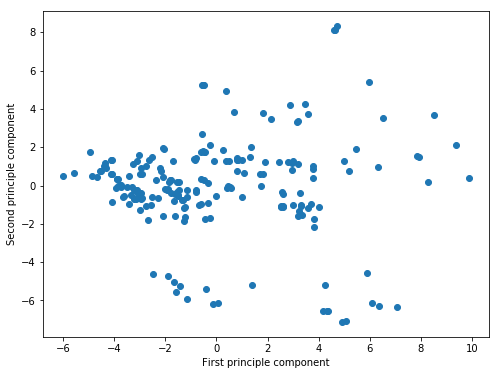

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(xpca[:,0],xpca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


## Calculating alpha values

In [53]:
%matplotlib inline


import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [54]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

# Splitting data into Train and Test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
y = df.Symboling

X = df.drop('Symboling', axis=1)

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [58]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.61% in training set
30.39% in test set


In [59]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 72)

In [60]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_test, y_test)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 72)

Text(0, 0.5, 'weights')

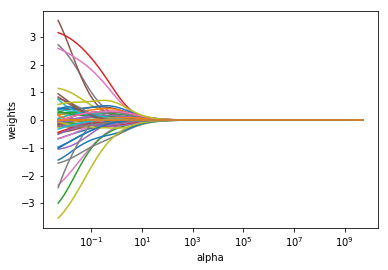

In [61]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# Naiive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7465



In [64]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [ 2.  2.  1.  0.  0.  1.  3.  2.  1. -2.  3.  1.  1.  1.  1. -1.  2.  0.
  2. -1.  1.  1.  3.  1.  3.  3.  0.  0.  2.  1.  1.  1.  3.  2.  1.  3.
 -1. -1.  0.  3.  2.  1.  2. -1.  3.  1.  0.  2.  1.  2.  0.  1. -1.  1.
  1. -1.  0.  1.  1.  0.  0.  2.]
y_test 168    2.0
185    2.0
122   -1.0
141    0.0
108    0.0
117    1.0
71     3.0
10     0.0
26     1.0
195   -2.0
127    3.0
30     2.0
86     1.0
118    1.0
32     1.0
201   -1.0
8      0.0
109    0.0
2      2.0
203   -1.0
52     1.0
25     1.0
130    2.0
159    0.0
28     3.0
54     3.0
153    0.0
129    0.0
169    2.0
42     0.0
      ... 
1      1.0
181    2.0
119    1.0
103    3.0
198   -1.0
67    -1.0
101    0.0
123    3.0
38     0.0
93     1.0
134    2.0
200   -1.0
171    2.0
80     3.0
14     0.0
158    0.0
27    -1.0
137    2.0
15     0.0
96     1.0
72     0.0
17     2.0
149    1.0
179   -1.0
64     0.0
37     0.0
77     2.0
100    0.0
139    2.0
157    0.0
Name: Symboling, Length: 62, dtype: float64
Accuracy:

# Metrics

In [65]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[ 1  0  0  0  0  0]
 [ 0  6  0  3  0  0]
 [ 0  1 10  3  5  0]
 [ 0  0  0 11  0  1]
 [ 0  0  1  4  7  2]
 [ 0  0  0  1  0  6]]

Classification Report
              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.86      0.67      0.75         9
         0.0       0.91      0.53      0.67        19
         1.0       0.50      0.92      0.65        12
         2.0       0.58      0.50      0.54        14
         3.0       0.67      0.86      0.75         7

   micro avg       0.66      0.66      0.66        62
   macro avg       0.75      0.74      0.73        62
weighted avg       0.72      0.66      0.66        62



## Ridge Regression

linear regression train score: 0.871670887948159
linear regression test score: 0.5618690128001811
ridge regression train score low alpha: 0.8715563930379681
ridge regression test score low alpha: 0.5759619428401419
ridge regression train score high alpha: 0.6383422961036496
ridge regression test score high alpha: 0.5364817205615846


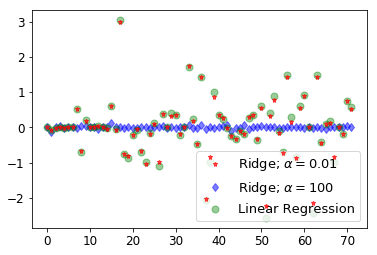

In [66]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge



lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')



plt.legend(fontsize=13,loc=4)
plt.show()


In [67]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data

print(mean_squared_error(pred2, y_test))          # Calculate the test MSE

0.9109811479897879


In [68]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

Normalized_losses          1.675833e-12
Wheel_base                -1.036913e-11
Length                    -3.148012e-12
Width                     -1.266704e-11
Height                    -2.549370e-11
Curb_weight               -4.749360e-14
Engine_size               -2.988360e-13
Bore                      -5.359753e-11
Stroke                    -4.675264e-12
Compression_ratio         -6.185081e-12
Horse_power                4.220653e-13
Peak_RPM                   8.748255e-14
City_mpg                  -2.079890e-12
Price                     -1.012321e-15
Isstd                      7.559682e-12
Istwo                      1.589557e-10
Make_alfa-romero           2.184397e-10
Make_audi                  5.897810e-11
Make_bmw                  -2.394161e-11
Make_chevrolet            -3.357143e-11
Make_dodge                 1.751825e-11
Make_honda                -2.940685e-11
Make_isuzu                 1.726619e-11
Make_jaguar               -8.489209e-11
Make_mazda                 2.667411e-11


In [69]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Normalized_losses          1.188928e-03
Wheel_base                -6.659895e-02
Length                    -2.401459e-02
Width                     -3.358932e-03
Height                    -1.215238e-02
Curb_weight                5.230745e-04
Engine_size                1.308901e-02
Bore                       5.180828e-01
Stroke                    -6.814481e-01
Compression_ratio          2.173740e-01
Horse_power                7.082329e-03
Peak_RPM                   2.173497e-04
City_mpg                   2.653473e-02
Price                     -1.809020e-05
Isstd                     -3.065325e-02
Istwo                      6.078908e-01
Make_alfa-romero          -2.866480e+11
Make_audi                 -2.866480e+11
Make_bmw                  -2.866480e+11
Make_chevrolet            -2.866480e+11
Make_dodge                -2.866480e+11
Make_honda                -2.866480e+11
Make_isuzu                -2.866480e+11
Make_jaguar               -2.866480e+11
Make_mazda                -2.866480e+11


## Using Cross-validation to tune hyperparameter (alpha)

In [70]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.18824679033962358

In [71]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.5754391143325962

In [72]:
ridge4.fit(X_train, y_train)
pd.Series(ridge4.coef_, index = X.columns)

Normalized_losses          0.004867
Wheel_base                -0.036156
Length                    -0.005214
Width                     -0.007178
Height                    -0.031630
Curb_weight                0.000002
Engine_size                0.001187
Bore                       0.105503
Stroke                    -0.064226
Compression_ratio          0.005769
Horse_power                0.001241
Peak_RPM                   0.000080
City_mpg                  -0.000268
Price                      0.000003
Isstd                      0.091040
Istwo                      0.546729
Make_alfa-romero           0.238335
Make_audi                  1.086606
Make_bmw                  -0.168874
Make_chevrolet            -0.343719
Make_dodge                -0.247175
Make_honda                -0.174184
Make_isuzu                -0.298717
Make_jaguar               -0.406991
Make_mazda                -0.167927
Make_mercedes-benz        -0.427082
Make_mercury              -0.135577
Make_mitsubishi            0

## Prediction 

In [73]:
finaly = ridge4.predict(X_test)
finaly

array([ 1.13269566,  1.04181246, -0.03608798,  0.15136898, -0.44296556,
        1.68470743,  1.63099532,  0.61058549,  0.51006642, -0.99195538,
        3.15835912,  1.59416355,  1.47143292,  2.22798171,  1.07611858,
       -1.19947796,  2.12832118, -0.44321359,  1.61487231, -1.26658653,
        0.32645803,  0.59101999,  1.39603923,  0.0344528 ,  1.34086274,
        2.95642446, -0.14589665,  0.39159857,  1.54543211,  0.319177  ,
        2.11170275,  1.62088053,  1.68864743,  1.73467375,  1.31809311,
        2.10327068, -1.24859154, -0.93581689,  0.18139798,  2.26686366,
       -0.09586204,  1.05729078,  1.62900356, -1.230753  ,  1.68304418,
        1.98315364,  0.37040631,  0.38807944, -0.26706391,  1.10142925,
        0.97607623,  0.4093915 , -0.95081961,  1.30624318,  0.81851344,
        0.14819375,  0.11709702,  0.91656843,  2.11309041,  0.31028315,
        1.10318233,  0.08673623])

Text(0, 0.5, 'Symboling')

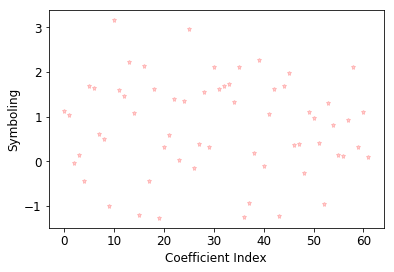

In [74]:
plt.plot(finaly,alpha=ridgecv.alpha_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = ridgecv.alpha_$',zorder=7) # zorder for ordering the markers
plt.xlabel('Coefficient Index')
plt.ylabel('Symboling')

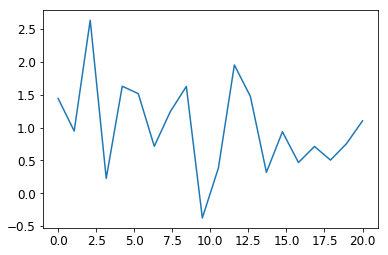

Text(0, 0.5, 'Symboling')

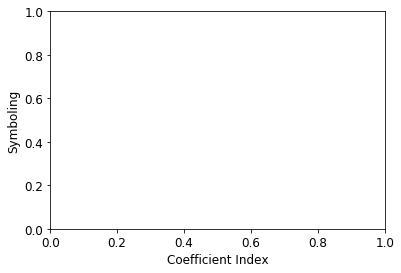

In [75]:
a = np.linspace(0, 20, 20)
s = [1.44241683,  0.9466379 ,  2.63315318,  0.22613603,  1.62847343, 1.51662927,  0.71512558,  1.24197318,  1.62529167, -0.37551353, 0.38202226,  1.9525528 ,  1.47323095,  0.3181132 ,  0.93573108, 0.4676778 ,  0.71229071,  0.50452338,  0.75531675,  1.10195787]
plt.plot(a, s)
plt.show()
plt.xlabel('Coefficient Index')
plt.ylabel('Symboling')

## SVR- Support Vector Regression

In [76]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import random
import math

In [77]:
model = SVR(gamma='scale', C=1e3)



print(model)

model.fit(X_train,y_train)
pred_y = model.predict(X_train)
pred_y1 = model.predict(X_test)



score=model.score(X_train,y_train)
print(score)

mse_train =mean_squared_error(y_train, pred_y)
print("Mean Squared Error, predicted for train values:",mse_train)

mse_test =mean_squared_error(y_test, pred_y1)
print("Mean Squared Error, predicted for test values:",mse_test)


rmse_train = math.sqrt(mse_train)
print("Root Mean Squared Error, predicted for train values:", rmse_train)

rmse_test = math.sqrt(mse_test)
print("Root Mean Squared Error, predicted for test values:", rmse_test)

pred_y1


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.9934521131108488
Mean Squared Error, predicted for train values: 0.009588673083855212
Mean Squared Error, predicted for test values: 1.785019468733085
Root Mean Squared Error, predicted for train values: 0.09792177022427245
Root Mean Squared Error, predicted for test values: 1.3360462075591117


array([ 0.65912362,  0.77954107,  0.93373661,  1.11100064,  1.26346309,
        1.30187474,  0.78770316,  0.98361398,  0.91984088,  1.92850158,
        0.82873654,  1.41076159,  0.55370379,  1.10002829,  1.17277652,
        0.99175909, -1.25362822,  0.81016562,  0.96160376,  0.81100994,
        1.12846202,  0.81217433,  0.25418593,  1.53107908,  1.05193842,
        0.80889704,  1.74140538,  0.26008527,  1.20719463,  0.27631432,
        1.15261893,  0.55803891,  1.63069125,  1.65448786,  1.10696808,
        0.74039762,  0.50702287,  0.39478973,  1.312466  ,  2.31606519,
        0.78095951,  1.09660111,  0.96759947,  0.82922206,  0.79712085,
        0.07202388,  0.83127709,  1.29361807,  0.97327871,  0.88843915,
        0.83127742,  1.69823349,  0.83127742,  0.72989863,  0.8553942 ,
       -1.1853738 , -0.1203184 ,  0.78152326,  0.93862465, -0.056727  ,
        0.99113985,  1.2962505 ])

In [78]:
import time

train_size = 143
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5, iid=False,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)
sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

SVR complexity and bandwidth selected and model fitted in 0.733 s
Support vector ratio: 1.000


In [79]:
svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

Text(0, 0.5, 'Predicted Test scores')

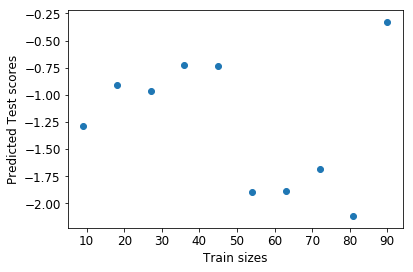

In [80]:
trace7 = plt.scatter(x=train_sizes, y=test_scores_svr.mean(0))
plt.xlabel('Train sizes')
plt.ylabel('Predicted Test scores')

## Thank You !